<a href="https://colab.research.google.com/github/soymarwin/ee298z-assignment01/blob/master/complete_cifar10_mlp_cnn_trials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EE298Z-Assignment01**
#### Written and Performed by **Marwin B. Alejo 2020-20221**
#### Performed on **September 26, 2020**

###### *Note: The following cells below are best viewed in Google Colab!*

**REQUIREMENTS**
1. Build a classifier on CIFAR10 dataset using MLP and CNN
2. The last layer is Dense
3. Hyperparameters are open for modification except for optimizer must be SGD
4. Use Jupyter notebook shared via Github
5. Implement using Keras or Pytorch
6. Compare Best MLP and CNN configuration

**USED COMPUTE RESOURCES**
1. Google Colab in CPU and TPU modes

**BEST CONFIGURATION**
1. [3-layer MLP: 53.49% Acc](https://colab.research.google.com/drive/1XjdwCKeoqJzHGCn1kadpF2urVXlkwDcH#scrollTo=MZVoL7e29Uyn&line=1&uniqifier=1)
2. [3-layer CNN: 82.85% Acc](https://colab.research.google.com/drive/1XjdwCKeoqJzHGCn1kadpF2urVXlkwDcH#scrollTo=3Nm7WAu12IJy&line=2&uniqifier=1)
3. [3-block CNN: 89.17% Acc](https://colab.research.google.com/drive/1XjdwCKeoqJzHGCn1kadpF2urVXlkwDcH#scrollTo=ssCl-Gv95m3t&line=4&uniqifier=1)

## **A 3-layer MLP configuration for CIFAR10 image classification**





### **MLP Skeleton**
*Disclaimer: This skeleton contain all the functions necessary for MLP model training on CPU mode only.*

In [ ]:
# Lib forevs
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple as nt
from keras.models import Model
from keras.layers import Dense, Activation, Flatten, Dropout, Input
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.datasets import cifar10
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

# Organizing CIFAR10 data as DATA
Data = nt("Data", "x_train y_train x_valid y_valid x_test y_test")

# Visualize the data.
def visualize_data(data):
    images_to_show = 36
    per_row = 12
    fig = plt.figure(figsize=(20,5))
    for i in range(images_to_show):
        pos = (i // per_row, ((i % per_row) + per_row) % per_row)
        ax = plt.subplot2grid((int(images_to_show / per_row), per_row),
                              pos, xticks=[], yticks=[])
        ax.imshow(np.squeeze(data.x_train[i]))
    plt.show()

# Function for model visualization
def visualize_training(hist):
    # Training v. validation accuracy chart
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()
    
    # Training v. validation loss chart
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

# Function to preprocess data
def preprocess(data, categories):
    x_train = data.x_train.astype("float32") / 255
    x_test = data.x_test.astype("float32") / 255
    y_train = to_categorical(data.y_train, categories)
    y_test = to_categorical(data.y_test, categories)    
    return Data(x_train[5000:], y_train[5000:],
                x_train[:5000], y_train[:5000],
                x_test, y_test)
    
def preprocess2(data, categories):
    # Z-score normalization of data
    mean = np.mean(data.x_train, axis=(0,1,2,3))
    std = np.std(data.x_train, axis=(0,1,2,3))
    x_train = ((data.x_train - mean) / (std + 1e-7)).astype("float32")
    x_test = ((data.x_test - mean) / (std + 1e-7)).astype("float32")
    y_train = to_categorical(data.y_train, categories)
    y_test = to_categorical(data.y_test, categories)    
    return Data(x_train[5000:], y_train[5000:],
                x_train[:5000], y_train[:5000],
                x_test, y_test)

# Vanilla MLP architecture
def vanilla_mlp(data, categories):
  inputs = Input(input_shape, )
  y = Flatten()(inputs)
  y = Dense(hidden_layer_1, activation=activation_1)(y)
  y = Dense(hidden_layer_2, activation=activation_1)(y)
  outputs = Dense(categories, activation=activation_2)(y)
  model = Model(inputs=inputs, outputs=outputs)
  model.compile(loss=loss, optimizer=optimizer, metrics=metrics) 
  return model

# MLP architecture with dropout
def dropout_mlp(data, categories):
  inputs = Input(input_shape, )
  y = Flatten()(inputs)
  y = Dense(hidden_layer_1, activation=activation_1)(y)
  y = Dropout(dropout_1)(y)
  y = Dense(hidden_layer_2, activation=activation_1)(y)
  y = Dropout(dropout_2)(y)
  outputs = Dense(categories, activation=activation_2)(y)
  model = Model(inputs=inputs, outputs=outputs)
  model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
  return model

# Load CIFAR10 Data as data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
data = Data(x_train, y_train, None, None, x_test, y_test)

# visualize CIFAR10 data samples (optional)
# visualize_data(data) # uncomment when wanted

# Preprocess the loaded data
categories = len(np.unique(data.y_train))
processed_data = preprocess(data, categories)

170500096/170498071 [==============================] - 2s 0us/step


#### **Configuration 1 (CPU): Vanilla MLP - Acc: 53.18% overfit**

Vanilla MLP Architecture:
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 3,676,682
Trainable params: 3,676,682
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1406/1407 [============================>.] - ETA: 0s - loss: 1.8483 - acc

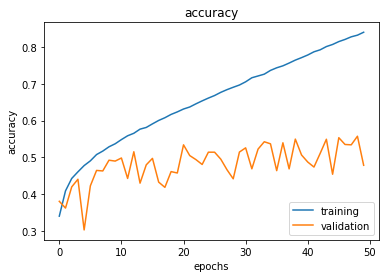

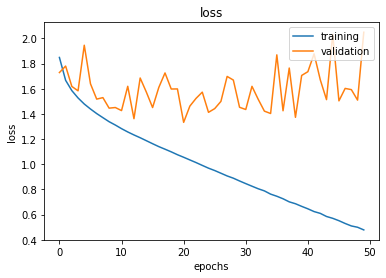

Loss: 134.86%
Accuracy: 53.18%


In [ ]:
# Parameters for MLP training
input_shape = data.x_train.shape[1:]
epochs = 50
batch_size = 32
# dropout_1 = 0.5
# dropout_2 = 0.5
hidden_layer_1 = 1024
hidden_layer_2 = 512
activation_1 = 'relu'
activation_2 = 'softmax'
optimizer = "sgd"
loss = "categorical_crossentropy"
metrics = ['accuracy']

# Build model with vanilla mlp
mlp_vanilla = vanilla_mlp(processed_data, categories)
print("Vanilla MLP Architecture:")
mlp_vanilla.summary()
mlp_vanilla_weights_path = "best_vanilla_MLP_model_cifar10.hdf5"

# vanilla_mlp
cp_vanilla_mlp = ModelCheckpoint(filepath=mlp_vanilla_weights_path, 
                                   verbose=1, save_best_only=True)
hist_vanilla_mlp = mlp_vanilla.fit(processed_data.x_train, 
                   processed_data.y_train, 
                   batch_size=batch_size, 
                   epochs=epochs, 
                   validation_data=(processed_data.x_valid,
                                    processed_data.y_valid),
                   callbacks=[cp_vanilla_mlp], shuffle=True)
# Train built vanilla mlp model
mlp_vanilla.load_weights(mlp_vanilla_weights_path)
score_mlp_vanilla = mlp_vanilla.evaluate(processed_data.x_test, processed_data.y_test, verbose=0)
visualize_training(hist_vanilla_mlp)
print("Loss: %.2f%%" % (score_mlp_vanilla[0]*100))
print("Accuracy: %.2f%%" % (score_mlp_vanilla[1]*100))

#### **Configuration 2 (CPU): MLP with 0.5 Dropout - Acc: 53.49% Converged**


MLP with Dropout Architecture:
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)        

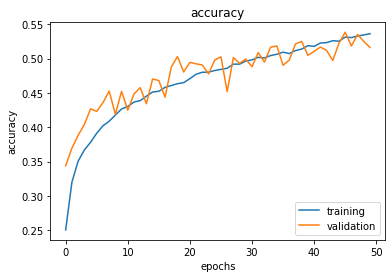

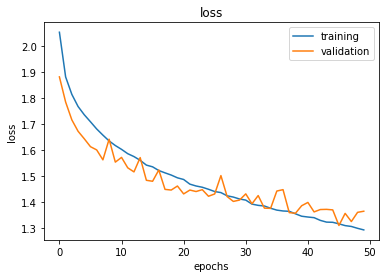

Loss: 130.09%
Accuracy: 53.49%


In [ ]:
# Parameters for MLP training
input_shape = data.x_train.shape[1:]
epochs = 50
batch_size = 32
dropout_1 = 0.5
dropout_2 = 0.5
hidden_layer_1 = 1024
hidden_layer_2 = 512
activation_1 = 'relu'
activation_2 = 'softmax'
optimizer = "sgd"
loss = "categorical_crossentropy"
metrics = ['accuracy']

# Build MLP model with dropout
mlp_dropout = dropout_mlp(processed_data, categories)
print("MLP with Dropout Architecture:")
mlp_dropout.summary()
mlp_dropout_weights_path = "best_dropout_MLP_model_cifar10.hdf5"

# vanilla_mlp
cp_dropout_mlp = ModelCheckpoint(filepath=mlp_dropout_weights_path, 
                                   verbose=1, save_best_only=True)
hist_dropout_mlp = mlp_dropout.fit(processed_data.x_train, 
                   processed_data.y_train, 
                   batch_size=batch_size, 
                   epochs=epochs, 
                   validation_data=(processed_data.x_valid,
                                    processed_data.y_valid),
                   callbacks=[cp_dropout_mlp], shuffle=True)
# Train built mlp model with dropout
mlp_dropout.load_weights(mlp_dropout_weights_path)
score_mlp_dropout = mlp_dropout.evaluate(processed_data.x_test, processed_data.y_test, verbose=0)
visualize_training(hist_dropout_mlp)
print("Loss: %.2f%%" % (score_mlp_dropout[0]*100))
print("Accuracy: %.2f%%" % (score_mlp_dropout[1]*100))

#### **Configuration 3 (CPU): MLP with 0.2 and 0.5 Dropout - Acc: 55.43% Overfit**

MLP with Dropout Architecture:
Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)       

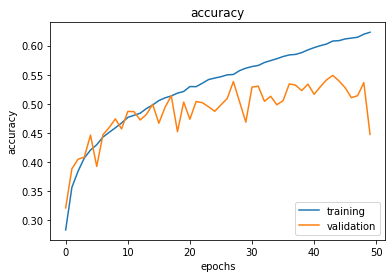

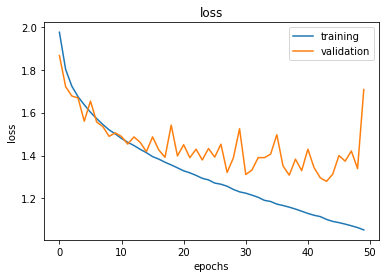

Loss: 127.09%
Accuracy: 55.43%


In [ ]:
# Parameters for MLP training
input_shape = data.x_train.shape[1:]
epochs = 50
batch_size = 32
dropout_1 = 0.2
dropout_2 = 0.5
hidden_layer_1 = 1024
hidden_layer_2 = 512
activation_1 = 'relu'
activation_2 = 'softmax'
optimizer = "sgd"
loss = "categorical_crossentropy"
metrics = ['accuracy']

# Build MLP model with 0.2 and 0.5 dropout
mlp_dropout = dropout_mlp(processed_data, categories)
print("MLP with Dropout Architecture:")
mlp_dropout.summary()
mlp_dropout_weights_path = "best_dropout_MLP_model_cifar10.hdf5"

# vanilla_mlp
cp_dropout_mlp = ModelCheckpoint(filepath=mlp_dropout_weights_path, 
                                   verbose=1, save_best_only=True)
hist_dropout_mlp = mlp_dropout.fit(processed_data.x_train, 
                   processed_data.y_train, 
                   batch_size=batch_size, 
                   epochs=epochs, 
                   validation_data=(processed_data.x_valid,
                                    processed_data.y_valid),
                   callbacks=[cp_dropout_mlp], shuffle=True)
# Train built mlp model with dropout
mlp_dropout.load_weights(mlp_dropout_weights_path)
score_mlp_dropout = mlp_dropout.evaluate(processed_data.x_test, processed_data.y_test, verbose=0)
visualize_training(hist_dropout_mlp)
print("Loss: %.2f%%" % (score_mlp_dropout[0]*100))
print("Accuracy: %.2f%%" % (score_mlp_dropout[1]*100))

#### **Configuration 4: MLP with 0.2 and 0.3 Dropout - Acc:55.67% Overfit**

MLP with Dropout Architecture:
Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)      

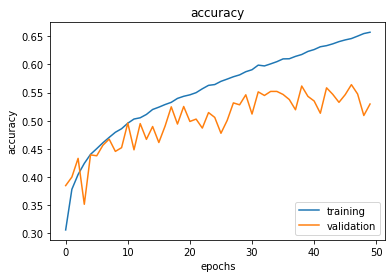

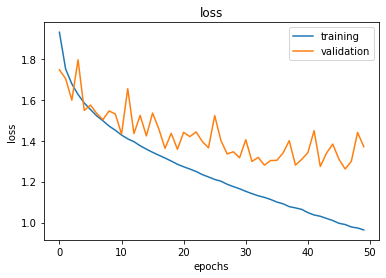

Loss: 125.84%
Accuracy: 55.67%


In [ ]:
# Parameters for MLP training
input_shape = data.x_train.shape[1:]
epochs = 50
batch_size = 32
dropout_1 = 0.2
dropout_2 = 0.3
hidden_layer_1 = 1024
hidden_layer_2 = 512
activation_1 = 'relu'
activation_2 = 'softmax'
optimizer = "sgd"
loss = "categorical_crossentropy"
metrics = ['accuracy']

# Build MLP model with 0.2 and 0.3 dropout
mlp_dropout = dropout_mlp(processed_data, categories)
print("MLP with Dropout Architecture:")
mlp_dropout.summary()
mlp_dropout_weights_path = "best_dropout_MLP_model_cifar10.hdf5"

# vanilla_mlp
cp_dropout_mlp = ModelCheckpoint(filepath=mlp_dropout_weights_path, 
                                   verbose=1, save_best_only=True)
hist_dropout_mlp = mlp_dropout.fit(processed_data.x_train, 
                   processed_data.y_train, 
                   batch_size=batch_size, 
                   epochs=epochs, 
                   validation_data=(processed_data.x_valid,
                                    processed_data.y_valid),
                   callbacks=[cp_dropout_mlp], shuffle=True)
# Train built mlp model with dropout
mlp_dropout.load_weights(mlp_dropout_weights_path)
score_mlp_dropout = mlp_dropout.evaluate(processed_data.x_test, processed_data.y_test, verbose=0)
visualize_training(hist_dropout_mlp)
print("Loss: %.2f%%" % (score_mlp_dropout[0]*100))
print("Accuracy: %.2f%%" % (score_mlp_dropout[1]*100))

#### **Configuration 5 (CPU): MLP with 0.5 Dropout and L1 L2 Regularization - Acc:52.88% Converged**

MLP with Dropout and Regularizers Architecture:
Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense

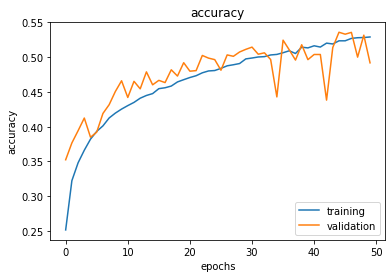

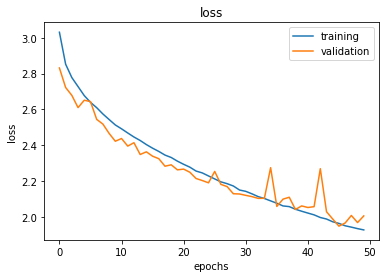

Loss: 194.16%
Accuracy: 52.88%


In [ ]:
# Parameters for MLP training
# Edit MLP configuration here, DO NOT EDIT THE ARCHS
input_shape = data.x_train.shape[1:]
epochs = 50
batch_size = 32
dropout_1 = 0.5
dropout_2 = 0.5
hidden_layer_1 = 1024
hidden_layer_2 = 512
activation_1 = 'relu'
activation_2 = 'softmax'
kernel_regularizer = regularizers.l1_l2(l1=1e-5, l2=1e-4)
bias_regularizer = regularizers.l2(1e-4)
activity_regularizer = regularizers.l2(1e-5)
optimizer = "sgd"
loss = "categorical_crossentropy"
metrics = ['accuracy']

# Build MLP model with dropout
mlp_reg_drp = reg_drp_mlp(processed_data, categories)
print("MLP with Dropout and Regularizers Architecture:")
mlp_reg_drp.summary()
mlp_reg_drp_weights_path = "best_reg_drp_MLP_model_cifar10.hdf5"

# reg_drp_mlp
cp_reg_drp_mlp = ModelCheckpoint(filepath=mlp_reg_drp_weights_path, 
                                   verbose=1, save_best_only=True)
hist_reg_drp_mlp = mlp_reg_drp.fit(processed_data.x_train, 
                   processed_data.y_train, 
                   batch_size=batch_size, 
                   epochs=epochs, 
                   validation_data=(processed_data.x_valid,
                                    processed_data.y_valid),
                   callbacks=[cp_reg_drp_mlp], shuffle=True)
# Train built mlp model with dropout
mlp_reg_drp.load_weights(mlp_reg_drp_weights_path)
score_mlp_reg_drp = mlp_reg_drp.evaluate(processed_data.x_test, processed_data.y_test, verbose=0)
visualize_training(hist_reg_drp_mlp)
print("Loss: %.2f%%" % (score_mlp_reg_drp[0]*100))
print("Accuracy: %.2f%%" % (score_mlp_reg_drp[1]*100))

#### **Configuration 6 (TPU): MLP with 0.5 Dropout, Data Augmentation, and LRS - Acc: 50.68% Overfit**



INFO:tensorflow:Initializing the TPU system: grpc://10.18.185.146:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.18.185.146:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


170500096/170498071 [==============================] - 2s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_____________________________________________________

Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


  1/390 [..............................] - ETA: 1s - loss: 3.4580 - sparse_categorical_accuracy: 0.0859WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0021s vs `on_train_batch_end` time: 0.0165s). Check your callbacks.


389/390 [============================>.] - ETA: 0s - loss: 2.6319 - sparse_categorical_accuracy: 0.2202WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0019s vs `on_test_batch_end` time: 0.0132s). Check your callbacks.


390/390 [==============================] - 10s 25ms/step - loss: 2.6315 - sparse_categorical_accuracy: 0.2202 - val_loss: 2.0128 - val_sparse_categorical_accuracy: 0.3672
Epoch 2/125
390/390 [==============================] - 8s 21ms/step - loss: 2.3493 - sparse_categorical_accuracy: 0.2657 - val_loss: 1.9577 - val_sparse_categorical_accuracy: 0.3864
Epoch 3/125
390/390 [==============================] - 8s 21ms/step - loss: 2.2260 - sparse_categorical_accuracy: 0.2924 - val_loss: 1.9317 - val_sparse_categorical_accuracy: 0.3913
Epoch 4/125
390/390 [==============================] - 8s 21ms/step - loss: 2.1562 - sparse_categorical_accuracy: 0.3085 - val_loss: 1.8818 - val_sparse_categorical_accuracy: 0.4191
Epoch 5/125
390/390 [==============================] - 8s 21ms/step - loss: 2.1052 - sparse_categorical_accuracy: 0.3240 - val_loss: 1.8756 - val_sparse_categorical_accuracy: 0.4128
Epoch 6/125
390/390 [==============================] - 8s 21ms/step - loss: 2.0730 - sparse_categoric

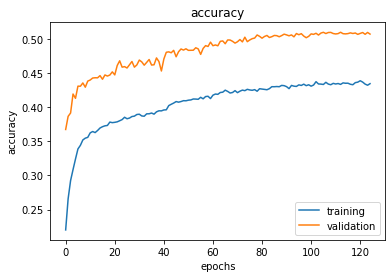

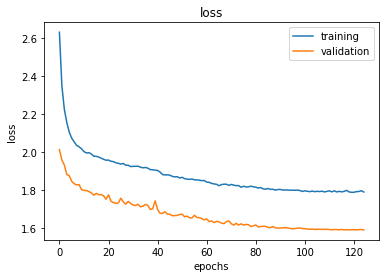

Loss: 158.96%
Accuracy: 50.68%


In [1]:
import tensorflow as tf
import os
import tensorflow.keras.layers as layers
import numpy as np
import pickle
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import math
from tensorflow.keras import regularizers

# TPU
tpu_grpc_url = "grpc://" + os.environ["COLAB_TPU_ADDR"]
tpu_cluster_resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_grpc_url)
tf.config.experimental_connect_to_cluster(tpu_cluster_resolver)
tf.tpu.experimental.initialize_tpu_system(tpu_cluster_resolver)
strategy = tf.distribute.experimental.TPUStrategy(tpu_cluster_resolver)

def data_augmentation(image):
    y = tf.cast(image, tf.float32) / 255.0
    y = tf.image.random_flip_left_right(y)
    y = tf.pad(y, tf.constant([[2, 2], [2, 2], [0, 0]]), "REFLECT")
    y = tf.image.random_crop(y, size=[32, 32, 3])
    return y

def create_model():
    inputs = layers.Input((32, 32, 3))
    y = layers.Flatten()(inputs)
    y = layers.Dense(1024, activation='relu',kernel_regularizer=regularizers.l2(1e-4))(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(0.5)(y)
    y = layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(1e-4))(y)
    y = layers.Dropout(0.5)(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dense(10, activation="softmax")(y)
    return tf.keras.models.Model(inputs, y)

def load_dataset():
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    trainset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    trainset = trainset.map(
        lambda image, label: (data_augmentation(image), tf.cast(label, tf.float32))
    ).shuffle(buffer_size=1024).repeat().batch(128)

    testset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
    testset = testset.map(
        lambda image, label: (tf.cast(image, tf.float32) / 255.0, tf.cast(label, tf.float32))
    ).batch(128)

    return trainset, testset

def lr_scheduler(epoch):
    lrate = 0.001
    if epoch > 40:
        lrate = 0.0005
    if epoch > 60:
        lrate = 0.0003
    if epoch > 80:
        lrate = 0.0001
    if epoch > 100:
        lrate = 0.00003
    if epoch > 120:
        lrate = 0.00005
    if epoch > 140:
        lrate = 0.000001
    if epoch > 160:
        lrate = 0.000003
    if epoch > 180:
        lrate = 0.000005   
    if epoch > 200:
        lrate = 0.0000001   
    return lrate

def main():
    trainset, testset = load_dataset()
    with strategy.scope():
        model = create_model()
        loss = tf.keras.losses.SparseCategoricalCrossentropy()
        acc = tf.keras.metrics.SparseCategoricalAccuracy()

        # callback
        scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
        hist = tf.keras.callbacks.History()
        # cp_cnn = ModelCheckpoint("best_CNN_cifar10.hdf5", verbose=1, save_best_only=True)
        optim = tf.keras.optimizers.SGD(0.001, momentum=0.9)

        # train
        model.compile(optimizer=optim, loss=loss, metrics=[acc])
        model.summary()
        model.fit(trainset, validation_data=testset, epochs=125, steps_per_epoch=50000 // 128,
                  callbacks=[scheduler, hist], shuffle=True)
    
    # model.load_weights("best_CNN_cifar10.hdf5")
    history = hist.history
    plt.plot(history['sparse_categorical_accuracy'])
    plt.plot(history['val_sparse_categorical_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()
    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

    score = model.evaluate(testset, verbose=0)
    print("Loss: %.2f%%" % (score[0]*100))
    print("Accuracy: %.2f%%" % (score[1]*100))

main()

#### **Configuration 7 (TPU): MLP with 0.5 Dropout, Data Augmentation, LRS, elu - Acc: 50.26% Overfit**

INFO:tensorflow:Initializing the TPU system: grpc://10.18.185.146:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.18.185.146:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)              

388/390 [============================>.] - ETA: 0s - loss: 2.5778 - sparse_categorical_accuracy: 0.2396WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0013s vs `on_test_batch_end` time: 0.0099s). Check your callbacks.


390/390 [==============================] - 9s 24ms/step - loss: 2.5772 - sparse_categorical_accuracy: 0.2396 - val_loss: 1.9793 - val_sparse_categorical_accuracy: 0.3843
Epoch 2/125
390/390 [==============================] - 8s 20ms/step - loss: 2.3112 - sparse_categorical_accuracy: 0.2837 - val_loss: 1.9078 - val_sparse_categorical_accuracy: 0.4114
Epoch 3/125
390/390 [==============================] - 8s 21ms/step - loss: 2.1990 - sparse_categorical_accuracy: 0.3071 - val_loss: 1.8719 - val_sparse_categorical_accuracy: 0.4265
Epoch 4/125
390/390 [==============================] - 8s 20ms/step - loss: 2.1329 - sparse_categorical_accuracy: 0.3226 - val_loss: 1.8598 - val_sparse_categorical_accuracy: 0.4256
Epoch 5/125
390/390 [==============================] - 8s 20ms/step - loss: 2.0919 - sparse_categorical_accuracy: 0.3362 - val_loss: 1.8419 - val_sparse_categorical_accuracy: 0.4351
Epoch 6/125
390/390 [==============================] - 8s 20ms/step - loss: 2.0679 - sparse_categorica

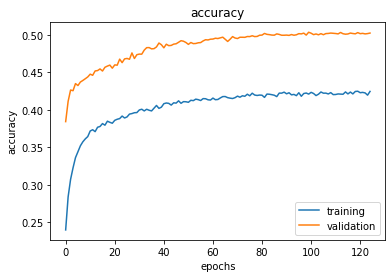

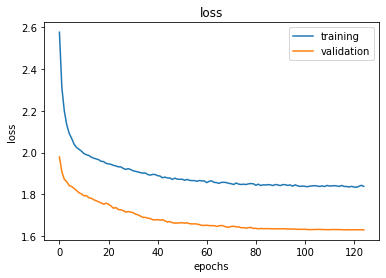

Loss: 162.94%
Accuracy: 50.26%


In [2]:
import tensorflow as tf
import os
import tensorflow.keras.layers as layers
import numpy as np
import pickle
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import math
from tensorflow.keras import regularizers

# TPU
tpu_grpc_url = "grpc://" + os.environ["COLAB_TPU_ADDR"]
tpu_cluster_resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_grpc_url)
tf.config.experimental_connect_to_cluster(tpu_cluster_resolver)
tf.tpu.experimental.initialize_tpu_system(tpu_cluster_resolver)
strategy = tf.distribute.experimental.TPUStrategy(tpu_cluster_resolver)

def data_augmentation(image):
    y = tf.cast(image, tf.float32) / 255.0
    y = tf.image.random_flip_left_right(y)
    y = tf.pad(y, tf.constant([[2, 2], [2, 2], [0, 0]]), "REFLECT")
    y = tf.image.random_crop(y, size=[32, 32, 3])
    return y

def create_model():
    inputs = layers.Input((32, 32, 3))
    y = layers.Flatten()(inputs)
    y = layers.Dense(1024, activation='elu',kernel_regularizer=regularizers.l2(1e-4))(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dropout(0.5)(y)
    y = layers.Dense(512, activation='elu',kernel_regularizer=regularizers.l2(1e-4))(y)
    y = layers.Dropout(0.5)(y)
    y = layers.BatchNormalization()(y)
    y = layers.Dense(10, activation="softmax")(y)
    return tf.keras.models.Model(inputs, y)

def load_dataset():
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    trainset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    trainset = trainset.map(
        lambda image, label: (data_augmentation(image), tf.cast(label, tf.float32))
    ).shuffle(buffer_size=1024).repeat().batch(128)

    testset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
    testset = testset.map(
        lambda image, label: (tf.cast(image, tf.float32) / 255.0, tf.cast(label, tf.float32))
    ).batch(128)

    return trainset, testset

def lr_scheduler(epoch):
    lrate = 0.001
    if epoch > 40:
        lrate = 0.0005
    if epoch > 60:
        lrate = 0.0003
    if epoch > 80:
        lrate = 0.0001
    if epoch > 100:
        lrate = 0.00003
    if epoch > 120:
        lrate = 0.00005
    if epoch > 140:
        lrate = 0.000001
    if epoch > 160:
        lrate = 0.000003
    if epoch > 180:
        lrate = 0.000005   
    if epoch > 200:
        lrate = 0.0000001   
    return lrate

def main():
    trainset, testset = load_dataset()
    with strategy.scope():
        model = create_model()
        loss = tf.keras.losses.SparseCategoricalCrossentropy()
        acc = tf.keras.metrics.SparseCategoricalAccuracy()

        # callback
        scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
        hist = tf.keras.callbacks.History()
        # cp_cnn = ModelCheckpoint("best_CNN_cifar10.hdf5", verbose=1, save_best_only=True)
        optim = tf.keras.optimizers.SGD(0.001, momentum=0.9)

        # train
        model.compile(optimizer=optim, loss=loss, metrics=[acc])
        model.summary()
        model.fit(trainset, validation_data=testset, epochs=125, steps_per_epoch=50000 // 128,
                  callbacks=[scheduler, hist], shuffle=True)
    
    # model.load_weights("best_CNN_cifar10.hdf5")
    history = hist.history
    plt.plot(history['sparse_categorical_accuracy'])
    plt.plot(history['val_sparse_categorical_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()
    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

    score = model.evaluate(testset, verbose=0)
    print("Loss: %.2f%%" % (score[0]*100))
    print("Accuracy: %.2f%%" % (score[1]*100))

main()

## **A 3-layer CNN configuration for CIFAR10 image classification**

### **CNN Skeleton**
*Disclaimer: This skeleton contain all the functions necessary for CNN model training on CPU mode only.*

In [ ]:
# Lib forevs
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple as nt
from keras.models import Model
from keras.layers import Dense, Activation, Flatten, Dropout, Input
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.datasets import cifar10
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import LearningRateScheduler, EarlyStopping
%matplotlib inline

# Organizing CIFAR10 data as DATA
Data = nt("Data", "x_train y_train x_valid y_valid x_test y_test")

# Visualize the data.
def visualize_data(data):
    images_to_show = 36
    per_row = 12
    fig = plt.figure(figsize=(20,5))
    for i in range(images_to_show):
        pos = (i // per_row, ((i % per_row) + per_row) % per_row)
        ax = plt.subplot2grid((int(images_to_show / per_row), per_row),
                              pos, xticks=[], yticks=[])
        ax.imshow(np.squeeze(data.x_train[i]))
    plt.show()

def sched_lr(epoch):
    lrate = 0.001
    if epoch > 40:
        lrate = 0.0005
    if epoch > 60:
        lrate = 0.0003
    if epoch > 80:
        lrate = 0.0001
    if epoch > 100:
        lrate = 0.00003     
    return lrate

# Function for model visualization
def visualize_training(hist):
    # Training v. validation accuracy chart
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()
    
    # Training v. validation loss chart
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

# Typical preprocessing
def preprocess(data, categories):
    x_train = data.x_train.astype("float32") / 255
    x_test = data.x_test.astype("float32") / 255
    y_train = to_categorical(data.y_train, categories)
    y_test = to_categorical(data.y_test, categories)    
    return Data(x_train[5000:], y_train[5000:],
                x_train[:5000], y_train[:5000],
                x_test, y_test)

# Preprocessor to use when using datagen  
def preprocess2(data, categories):
    # Z-score normalization of data
    mean = np.mean(data.x_train, axis=(0,1,2,3))
    std = np.std(data.x_train, axis=(0,1,2,3))
    x_train = ((data.x_train - mean) / (std + 1e-7)).astype("float32")
    x_test = ((data.x_test - mean) / (std + 1e-7)).astype("float32")
    y_train = to_categorical(data.y_train, categories)
    y_test = to_categorical(data.y_test, categories)    
    return Data(x_train[5000:], y_train[5000:],
                x_train[:5000], y_train[:5000],
                x_test, y_test)

def vanilla_cnn(data, categories):
    inputs = Input(input_shape)
    y = Conv2D(filters=filter_1, kernel_size=kernel_size, 
               padding=padding, activation=activation_1)(inputs)
    y = MaxPooling2D()(y)
    y = Conv2D(filters=filter_2, kernel_size=kernel_size, 
               padding=padding, activation=activation_1)(y)
    y = MaxPooling2D()(y)
    y = Flatten()(y)
    outputs = Dense(categories, activation=activation_2)(y)
    model = Model(outputs=outputs, inputs=inputs)
    model.compile(loss=loss, optimizer=optimizer,
                  metrics=metrics)
    return model

def vanilla_cnn2(data, categories):
    inputs = Input(input_shape)
    y = Conv2D(filters=filter_1, kernel_size=kernel_size, 
               padding=padding, activation=activation_1)(inputs)
    y = MaxPooling2D()(y)
    y = Conv2D(filters=filter_2, kernel_size=kernel_size, 
               padding=padding, activation=activation_1)(y)
    y = MaxPooling2D()(y)
    y = Conv2D(filters=filter_3, kernel_size=kernel_size, 
               padding=padding, activation=activation_1)(y)
    y = MaxPooling2D()(y)
    y = Flatten()(y)
    outputs = Dense(categories, activation=activation_2)(y)
    model = Model(outputs=outputs, inputs=inputs)
    model.compile(loss=loss, optimizer=optimizer,
                  metrics=metrics)
    return model

def vanilla_cnn3(data, categories):
    inputs = Input(input_shape)
    y = Conv2D(filters=filter_1, kernel_size=kernel_size, 
               padding=padding, activation=activation_1)(inputs)
    y = MaxPooling2D()(y)
    y = Dropout(dropout_1)(y)
    y = Conv2D(filters=filter_2, kernel_size=kernel_size, 
               padding=padding, activation=activation_1)(y)
    y = MaxPooling2D()(y)
    y = Dropout(dropout_2)(y)
    y = Flatten()(y)
    outputs = Dense(categories, activation=activation_2)(y)
    model = Model(outputs=outputs, inputs=inputs)
    model.compile(loss=loss, optimizer=optimizer,
                  metrics=metrics)
    return model

def vanilla_cnn4(data, categories):
    inputs = Input(input_shape)
    y = Conv2D(filter_1, 
          kernel_size=kernel_size,
          activation=activation_1)(inputs)
    y = MaxPooling2D(pool_size=pool_size)(y)
    y = Conv2D(hidden_layer_1, 
          kernel_size=kernel_size,
          activation=activation_1)(y)
    y = MaxPooling2D(pool_size=pool_size)(y)
    y = Conv2D(hidden_layer_1, 
          kernel_size=kernel_size,
          activation=activation_1)(y)
    y = MaxPooling2D(pool_size=pool_size)(y)
    y = Dropout(dropout_1)(y)
    y = Flatten()(y)
    y = Dense(hidden_layer_3, activation=activation_1)(y)
    outputs = Dense(categories, activation=activation_2)(y)
    model = Model(outputs=outputs, inputs=inputs)
    model.compile(loss=loss, optimizer=hyper_sgd,
                  metrics=metrics)
    return model

def hyper_cnn(data, categories):
    inputs = Input(input_shape)
    y = Conv2D(filter_3,
              kernel_size=kernel_size,
              padding=padding,
              kernel_regularizer=kernel_regularizer,
              activation=activation_1)(inputs)
    y = BatchNormalization()(y)
    y = MaxPooling2D(pool_size=pool_size)(y)

    y = Conv2D(filter_3,
              kernel_size=kernel_size,
              padding=padding,
              kernel_regularizer=kernel_regularizer,
              activation=activation_1)(y)
    y = BatchNormalization()(y)
    y = MaxPooling2D(pool_size=pool_size)(y)

    y = Conv2D(filter_3,
              padding=padding,
              kernel_size=kernel_size,
              kernel_regularizer=kernel_regularizer,
              activation=activation_1)(y)
    y = BatchNormalization()(y)
    y = MaxPooling2D(pool_size=pool_size)(y)
    y = Dropout(dropout_1)(y)

    y = Flatten()(y)
    outputs = Dense(categories, activation=activation_2)(y)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    return model

categories = len(np.unique(data.y_train))
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
data = Data(x_train, y_train, None, None, x_test, y_test)

#### **Configuration 1 (CPU): Vanilla CNN - Acc:69.54%**

Vanilla CNN Architecture:
Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_4 (Dense)             

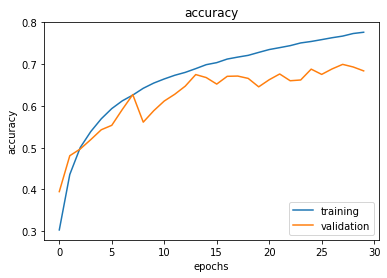

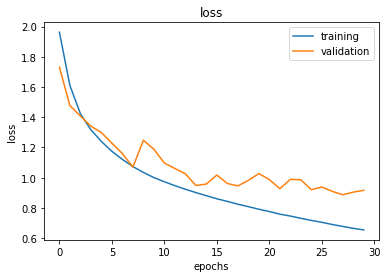

Loss: 90.64%
Accuracy: 69.54%


In [ ]:
# Edit CNN paratemeters here. DO NOT EDIT params above.
filter_1 = 32
filter_2 = 64
filter_3 = 128
hidden_layer_1 = 32
hidden_layer_2 = 64
hidden_layer_3 = 128
kernel_size = 3
pool_size = 2
padding = 'same'
activation_1 = 'relu'
activation_2 = 'softmax'
dropout_1 = 0.5
dropout_2 = 0.5
dropout_3 = 0.5
input_shape = data.x_train.shape[1:]
loss = "categorical_crossentropy"
optimizer = "sgd"
metrics = ["accuracy"]
weight_decay = 1e-4
kernel_regularizer=regularizers.l2(weight_decay)
epochs = 30
batch_size = 32
hyper_sgd = SGD(lr=0.001)

# preprocessing data
processed_data = preprocess(data, categories)

# build vanilla CNN
cnn_vanilla = vanilla_cnn(processed_data, categories)
print("Vanilla CNN Architecture:")
cnn_vanilla.summary()
vanilla_cnn_weights_path = "best_vanilla_CNN_cifar10.hdf5"
cp_vanilla_cnn = ModelCheckpoint(vanilla_cnn_weights_path, 
                                 verbose=1, 
                                 save_best_only=True)
hist_vanilla_cnn = cnn_vanilla.fit(processed_data.x_train, 
                                   processed_data.y_train, 
                                   batch_size=batch_size, 
                                   epochs=epochs, 
                                   validation_data=(processed_data.x_valid, 
                                                    processed_data.y_valid),
                                   callbacks=[cp_vanilla_cnn],
                                   shuffle=True)
visualize_training(hist_vanilla_cnn)
cnn_vanilla.load_weights(vanilla_cnn_weights_path)
score_vanilla_cnn = cnn_vanilla.evaluate(processed_data.x_test, 
                                         processed_data.y_test, 
                                         verbose=0)
print("Loss: %.2f%%" % (score_vanilla_cnn[0]*100))
print("Accuracy: %.2f%%" % (score_vanilla_cnn[1]*100))

#### **Configureation 2 (CPU): Vanilla CNN v2 - Acc:70.75% Overfit**

Vanilla CNN v2 Architecture:
Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_19 (MaxPoo

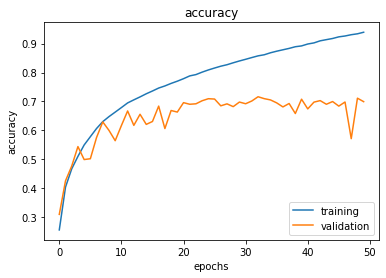

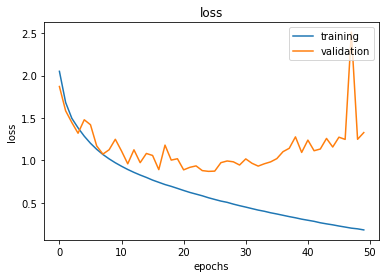

Loss: 91.34%
Accuracy: 70.75%


In [ ]:
# Edit CNN paratemeters here. DO NOT EDIT params above.
filter_1 = 32
filter_2 = 64
filter_3 = 128
hidden_layer_1 = 32
hidden_layer_2 = 64
hidden_layer_3 = 128
kernel_size = 3
pool_size = 2
padding = 'same'
activation_1 = 'relu'
activation_2 = 'softmax'
dropout_1 = 0.5
dropout_2 = 0.5
dropout_3 = 0.5
input_shape = data.x_train.shape[1:]
loss = "categorical_crossentropy"
optimizer = "sgd"
metrics = ["accuracy"]
weight_decay = 1e-4
kernel_regularizer=regularizers.l2(weight_decay)
epochs = 50
batch_size = 32
hyper_sgd = SGD(lr=0.001)

# preprocessing data
processed_data = preprocess(data, categories)

# build vanilla CNN
cnn_vanilla2 = vanilla_cnn2(processed_data, categories)
print("Vanilla CNN v2 Architecture:")
cnn_vanilla2.summary()
vanilla2_cnn_weights_path = "best_vanilla2_CNN_cifar10.hdf5"
cp_vanilla2_cnn = ModelCheckpoint(vanilla2_cnn_weights_path, 
                                 verbose=1, 
                                 save_best_only=True)
hist_vanilla2_cnn = cnn_vanilla2.fit(processed_data.x_train, 
                                   processed_data.y_train, 
                                   batch_size=batch_size, 
                                   epochs=epochs, 
                                   validation_data=(processed_data.x_valid, 
                                                    processed_data.y_valid),
                                   callbacks=[cp_vanilla2_cnn],
                                   shuffle=True)
visualize_training(hist_vanilla2_cnn)
cnn_vanilla2.load_weights(vanilla2_cnn_weights_path)
score_vanilla2_cnn = cnn_vanilla2.evaluate(processed_data.x_test, 
                                           processed_data.y_test, 
                                           verbose=0)
print("Loss: %.2f%%" % (score_vanilla2_cnn[0]*100))
print("Accuracy: %.2f%%" % (score_vanilla2_cnn[1]*100))

#### **Configuration 3 (CPU): Vanilla CNN with 0.5 Dropout - Acc:70.20%**

Vanilla CNN v3 Architecture:
Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_15 (Dropout)    

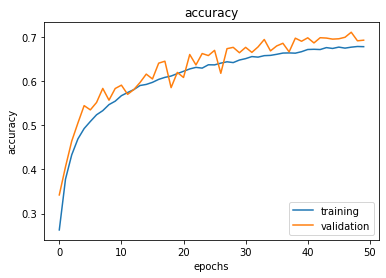

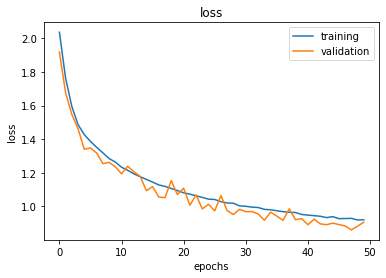

Loss: 87.84%
Accuracy: 70.20%


In [ ]:
# Edit CNN paratemeters here. DO NOT EDIT params above.
filter_1 = 32
filter_2 = 64
filter_3 = 128
hidden_layer_1 = 32
hidden_layer_2 = 64
hidden_layer_3 = 128
kernel_size = 3
pool_size = 2
padding = 'same'
activation_1 = 'relu'
activation_2 = 'softmax'
dropout_1 = 0.5
dropout_2 = 0.5
dropout_3 = 0.5
input_shape = data.x_train.shape[1:]
loss = "categorical_crossentropy"
optimizer = "sgd"
metrics = ["accuracy"]
weight_decay = 1e-4
kernel_regularizer=regularizers.l2(weight_decay)
epochs = 50
batch_size = 32
hyper_sgd = SGD(lr=0.001)

# preprocessing data
processed_data = preprocess(data, categories)

# build vanilla CNN
cnn_vanilla3 = vanilla_cnn3(processed_data, categories)
print("Vanilla CNN v3 Architecture:")
cnn_vanilla3.summary()
vanilla3_cnn_weights_path = "best_vanilla_CNN_cifar10.hdf5"
cp_vanilla3_cnn = ModelCheckpoint(vanilla3_cnn_weights_path, 
                                 verbose=1, 
                                 save_best_only=True)
hist_vanilla3_cnn = cnn_vanilla3.fit(processed_data.x_train, 
                                     processed_data.y_train, 
                                     batch_size=batch_size, 
                                     epochs=epochs, 
                                     validation_data=(processed_data.x_valid, 
                                                      processed_data.y_valid),
                                     callbacks=[cp_vanilla3_cnn],
                                     shuffle=True)
visualize_training(hist_vanilla3_cnn)
cnn_vanilla3.load_weights(vanilla3_cnn_weights_path)
score_vanilla3_cnn = cnn_vanilla3.evaluate(processed_data.x_test, 
                                         processed_data.y_test, 
                                         verbose=0)
print("Loss: %.2f%%" % (score_vanilla3_cnn[0]*100))
print("Accuracy: %.2f%%" % (score_vanilla3_cnn[1]*100))

#### **Configuration 4 (CPU): Vanilla CNN with 0.25 Dropout - Acc:70.95%**

Vanilla CNN v4 Architecture:
Model: "functional_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 4, 4, 32)          9248      
_________________________________________________________________
max_pooling2d_42 (MaxPoo

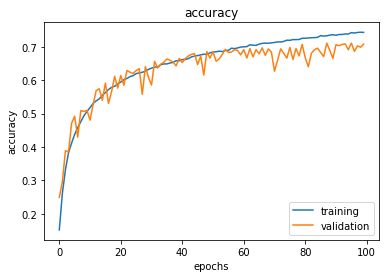

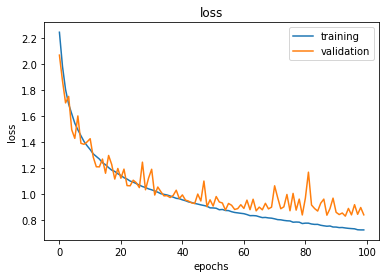

Loss: 84.37%
Accuracy: 70.95%


In [ ]:
# Edit CNN paratemeters here. DO NOT EDIT params above.
filter_1 = 32
# filter_2 = 64
# filter_3 = 128
# hidden_layer_1 = 32
# hidden_layer_2 = 64
hidden_layer_3 = 128
kernel_size = 3
pool_size = 2
padding = 'same'
activation_1 = 'relu'
activation_2 = 'softmax'
dropout_1 = 0.25
# dropout_2 = 0.5
# dropout_3 = 0.5
input_shape = data.x_train.shape[1:]
loss = "categorical_crossentropy"
optimizer = "sgd"
metrics = ["accuracy"]
# weight_decay = 1e-4
# kernel_regularizer=regularizers.l2(weight_decay)
epochs = 100
batch_size = 32
hyper_sgd = SGD(lr=0.01)

# preprocessing data
processed_data = preprocess(data, categories)

# build vanilla CNN
cnn_vanilla4 = vanilla_cnn4(processed_data, categories)
print("Vanilla CNN v4 Architecture:")
cnn_vanilla4.summary()
vanilla4_cnn_weights_path = "best_vanilla4_CNN_cifar10.hdf5"
cp_vanilla4_cnn = ModelCheckpoint(vanilla4_cnn_weights_path, 
                                 verbose=1, 
                                 save_best_only=True)
hist_vanilla4_cnn = cnn_vanilla4.fit(processed_data.x_train, 
                                     processed_data.y_train, 
                                     batch_size=batch_size, 
                                     epochs=epochs, 
                                     validation_data=(processed_data.x_valid, 
                                                      processed_data.y_valid),
                                     callbacks=[cp_vanilla4_cnn],
                                     shuffle=True)
visualize_training(hist_vanilla4_cnn)
cnn_vanilla4.load_weights(vanilla4_cnn_weights_path)
score_vanilla4_cnn = cnn_vanilla4.evaluate(processed_data.x_test, 
                                         processed_data.y_test, 
                                         verbose=0)
print("Loss: %.2f%%" % (score_vanilla4_cnn[0]*100))
print("Accuracy: %.2f%%" % (score_vanilla4_cnn[1]*100))

#### **Configuration 5 (TPU): CNN with Ave.Pooling and lrs - Acc:79.72%**

In [ ]:
import tensorflow as tf
import os
import tensorflow.keras.layers as layers
import numpy as np
import pickle
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

# TPU
tpu_grpc_url = "grpc://" + os.environ["COLAB_TPU_ADDR"]
tpu_cluster_resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_grpc_url)
tf.config.experimental_connect_to_cluster(tpu_cluster_resolver)
tf.tpu.experimental.initialize_tpu_system(tpu_cluster_resolver)
strategy = tf.distribute.experimental.TPUStrategy(tpu_cluster_resolver)

def data_augmentation(image):
    y = tf.cast(image, tf.float32) / 255.0
    y = tf.image.random_flip_left_right(y)
    y = tf.pad(y, tf.constant([[2, 2], [2, 2], [0, 0]]), "REFLECT")
    y = tf.image.random_crop(y, size=[32, 32, 3])
    return y

def conv_bn_relu(inputs, ch, reps):
    y = inputs
    for i in range(reps):
        y = layers.Conv2D(ch, 3, padding="same")(y)
        y = layers.BatchNormalization()(y)
        y = layers.Activation("relu")(y)
    return y

def create_model():
    inputs = layers.Input((32, 32, 3))
    y = conv_bn_relu(inputs, 64, 1)
    y = layers.AveragePooling2D(2)(y)
    y = conv_bn_relu(y, 128, 1)
    y = layers.AveragePooling2D(2)(y)
    y = conv_bn_relu(y, 256, 1)
    y = layers.GlobalAveragePooling2D()(y)
    y = layers.Dense(10, activation="softmax")(y)
    return tf.keras.models.Model(inputs, y)

def load_dataset():
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    trainset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    trainset = trainset.map(
        lambda image, label: (data_augmentation(image), tf.cast(label, tf.float32))
    ).shuffle(buffer_size=1024).repeat().batch(128)

    testset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
    testset = testset.map(
        lambda image, label: (tf.cast(image, tf.float32) / 255.0, tf.cast(label, tf.float32))
    ).batch(128)

    return trainset, testset

def lr_scheduler(epoch):
    lrate = 0.001
    if epoch > 40:
        lrate = 0.0005
    if epoch > 60:
        lrate = 0.0003
    if epoch > 80:
        lrate = 0.0001
    if epoch > 100:
        lrate = 0.00003  
    return lrate

def main():
    trainset, testset = load_dataset()
    with strategy.scope():
        model = create_model()
        loss = tf.keras.losses.SparseCategoricalCrossentropy()
        acc = tf.keras.metrics.SparseCategoricalAccuracy()
        optim = tf.keras.optimizers.SGD(0.001, momentum=0.9)

        # callback
        scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
        hist = tf.keras.callbacks.History()
        # cp_cnn = ModelCheckpoint("best_CNN_cifar10.hdf5", verbose=1, save_best_only=True)

        # train
        model.compile(optimizer=optim, loss=loss, metrics=[acc])
        # model.summary()
        model.fit(trainset, validation_data=testset, epochs=125, steps_per_epoch=50000 // 128,
                  callbacks=[scheduler, hist], shuffle=True)
    
    # model.load_weights("best_CNN_cifar10.hdf5")
    history = hist.history
    plt.plot(history['sparse_categorical_accuracy'])
    plt.plot(history['val_sparse_categorical_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()
    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

    score = model.evaluate(testset, verbose=0)
    print("Loss: %.2f%%" % (score[0]*100))
    print("Accuracy: %.2f%%" % (score[1]*100))


INFO:tensorflow:Initializing the TPU system: grpc://10.11.152.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.11.152.2:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


170500096/170498071 [==============================] - 2s 0us/step
Epoch 1/125
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


  1/390 [..............................] - ETA: 0s - loss: 2.3911 - sparse_categorical_accuracy: 0.0781WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0020s vs `on_train_batch_end` time: 0.0178s). Check your callbacks.


390/390 [==============================] - ETA: 0s - loss: 1.8524 - sparse_categorical_accuracy: 0.3361WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0017s vs `on_test_batch_end` time: 0.0130s). Check your callbacks.


390/390 [==============================] - 10s 25ms/step - loss: 1.8524 - sparse_categorical_accuracy: 0.3361 - val_loss: 2.3730 - val_sparse_categorical_accuracy: 0.1854
Epoch 2/125
390/390 [==============================] - 8s 21ms/step - loss: 1.6179 - sparse_categorical_accuracy: 0.4275 - val_loss: 1.7360 - val_sparse_categorical_accuracy: 0.3730
Epoch 3/125
390/390 [==============================] - 8s 21ms/step - loss: 1.5106 - sparse_categorical_accuracy: 0.4686 - val_loss: 2.2951 - val_sparse_categorical_accuracy: 0.2775
Epoch 4/125
390/390 [==============================] - 8s 20ms/step - loss: 1.4394 - sparse_categorical_accuracy: 0.4942 - val_loss: 1.7318 - val_sparse_categorical_accuracy: 0.3911
Epoch 5/125
390/390 [==============================] - 8s 21ms/step - loss: 1.3798 - sparse_categorical_accuracy: 0.5172 - val_loss: 2.4657 - val_sparse_categorical_accuracy: 0.2450
Epoch 6/125
390/390 [==============================] - 8s 21ms/step - loss: 1.3379 - sparse_categoric

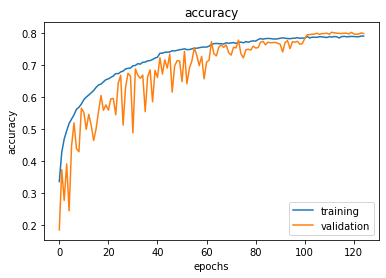

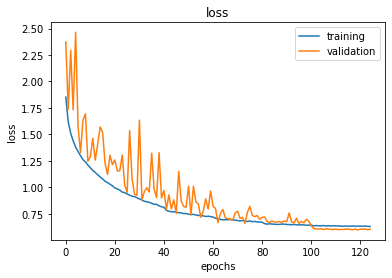

Loss: 60.29%
Accuracy: 79.72%


In [ ]:
main()

#### **Configuration 6 (TPU): CNN with Ave.Pooling, 0.5 Dropout and lrs - Acc:77.11%**

In [ ]:
import tensorflow as tf
import os
import tensorflow.keras.layers as layers
import numpy as np
import pickle
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

# TPU
tpu_grpc_url = "grpc://" + os.environ["COLAB_TPU_ADDR"]
tpu_cluster_resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_grpc_url)
tf.config.experimental_connect_to_cluster(tpu_cluster_resolver)
tf.tpu.experimental.initialize_tpu_system(tpu_cluster_resolver)
strategy = tf.distribute.experimental.TPUStrategy(tpu_cluster_resolver)

def data_augmentation(image):
    y = tf.cast(image, tf.float32) / 255.0
    y = tf.image.random_flip_left_right(y)
    y = tf.pad(y, tf.constant([[2, 2], [2, 2], [0, 0]]), "REFLECT")
    y = tf.image.random_crop(y, size=[32, 32, 3])
    return y

def conv_bn_relu(inputs, ch, reps):
    y = inputs
    for i in range(reps):
        y = layers.Conv2D(ch, 3, padding="same")(y)
        y = layers.BatchNormalization()(y)
        y = layers.Activation("relu")(y)
    return y

def create_model():
    inputs = layers.Input((32, 32, 3))
    y = conv_bn_relu(inputs, 64, 1)
    y = layers.AveragePooling2D(2)(y)
    y = conv_bn_relu(y, 128, 1)
    y = layers.AveragePooling2D(2)(y)
    y = conv_bn_relu(y, 256, 1)
    y = layers.GlobalAveragePooling2D()(y)
    y = layers.Dropout(0.25)(y)
    y = layers.Dense(10, activation="softmax")(y)
    return tf.keras.models.Model(inputs, y)

def load_dataset():
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    trainset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    trainset = trainset.map(
        lambda image, label: (data_augmentation(image), tf.cast(label, tf.float32))
    ).shuffle(buffer_size=1024).repeat().batch(128)

    testset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
    testset = testset.map(
        lambda image, label: (tf.cast(image, tf.float32) / 255.0, tf.cast(label, tf.float32))
    ).batch(128)

    return trainset, testset

def lr_scheduler(epoch):
    lrate = 0.001
    if epoch > 40:
        lrate = 0.0005
    if epoch > 60:
        lrate = 0.0003
    if epoch > 80:
        lrate = 0.0001
    if epoch > 100:
        lrate = 0.00003  
    return lrate

def main():
    trainset, testset = load_dataset()
    with strategy.scope():
        model = create_model()
        loss = tf.keras.losses.SparseCategoricalCrossentropy()
        acc = tf.keras.metrics.SparseCategoricalAccuracy()
        optim = tf.keras.optimizers.SGD(0.001, momentum=0.9)

        # callback
        scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
        hist = tf.keras.callbacks.History()
        # cp_cnn = ModelCheckpoint("best_CNN_cifar10.hdf5", verbose=1, save_best_only=True)

        # train
        model.compile(optimizer=optim, loss=loss, metrics=[acc])
        model.summary()
        model.fit(trainset, validation_data=testset, epochs=125, steps_per_epoch=50000 // 128,
                  callbacks=[scheduler, hist], shuffle=True)
    
    # model.load_weights("best_CNN_cifar10.hdf5")
    history = hist.history
    plt.plot(history['sparse_categorical_accuracy'])
    plt.plot(history['val_sparse_categorical_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()
    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

    score = model.evaluate(testset, verbose=0)
    print("Loss: %.2f%%" % (score[0]*100))
    print("Accuracy: %.2f%%" % (score[1]*100))


INFO:tensorflow:Initializing the TPU system: grpc://10.11.152.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.11.152.2:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 128)      

388/390 [============================>.] - ETA: 0s - loss: 1.8947 - sparse_categorical_accuracy: 0.2985WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0017s vs `on_test_batch_end` time: 0.0121s). Check your callbacks.


390/390 [==============================] - 10s 24ms/step - loss: 1.8940 - sparse_categorical_accuracy: 0.2989 - val_loss: 2.3232 - val_sparse_categorical_accuracy: 0.1785
Epoch 2/125
390/390 [==============================] - 8s 20ms/step - loss: 1.6645 - sparse_categorical_accuracy: 0.3870 - val_loss: 1.5548 - val_sparse_categorical_accuracy: 0.4331
Epoch 3/125
390/390 [==============================] - 8s 21ms/step - loss: 1.5522 - sparse_categorical_accuracy: 0.4363 - val_loss: 1.6933 - val_sparse_categorical_accuracy: 0.3928
Epoch 4/125
390/390 [==============================] - 8s 21ms/step - loss: 1.4800 - sparse_categorical_accuracy: 0.4654 - val_loss: 1.4757 - val_sparse_categorical_accuracy: 0.4712
Epoch 5/125
390/390 [==============================] - 8s 21ms/step - loss: 1.4276 - sparse_categorical_accuracy: 0.4862 - val_loss: 1.5653 - val_sparse_categorical_accuracy: 0.4460
Epoch 6/125
390/390 [==============================] - 9s 22ms/step - loss: 1.3814 - sparse_categoric

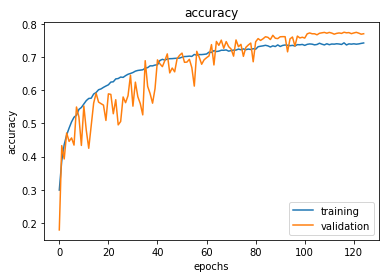

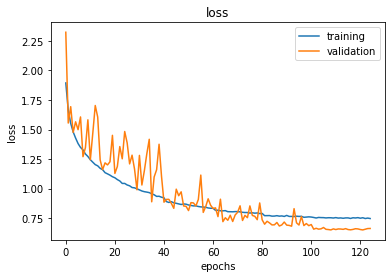

Loss: 66.26%
Accuracy: 77.11%


In [ ]:
main()

#### **Configuration 7 (TPU): CNN with Ave.Pooling, 0.2 Dropout, elu, and lrs - Acc:69.90%**

INFO:tensorflow:Initializing the TPU system: grpc://10.11.152.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.11.152.2:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
average_pooling2d_6 (Average (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_10 (Batc (None, 16, 16, 128)      

387/390 [============================>.] - ETA: 0s - loss: 1.8945 - sparse_categorical_accuracy: 0.3075WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0015s vs `on_test_batch_end` time: 0.0104s). Check your callbacks.


390/390 [==============================] - 10s 26ms/step - loss: 1.8934 - sparse_categorical_accuracy: 0.3080 - val_loss: 2.5087 - val_sparse_categorical_accuracy: 0.1435
Epoch 2/125
390/390 [==============================] - 8s 20ms/step - loss: 1.7207 - sparse_categorical_accuracy: 0.3722 - val_loss: 1.8755 - val_sparse_categorical_accuracy: 0.3246
Epoch 3/125
390/390 [==============================] - 8s 21ms/step - loss: 1.6629 - sparse_categorical_accuracy: 0.3938 - val_loss: 1.8544 - val_sparse_categorical_accuracy: 0.3408
Epoch 4/125
390/390 [==============================] - 8s 21ms/step - loss: 1.6232 - sparse_categorical_accuracy: 0.4126 - val_loss: 1.5828 - val_sparse_categorical_accuracy: 0.4075
Epoch 5/125
390/390 [==============================] - 8s 21ms/step - loss: 1.5929 - sparse_categorical_accuracy: 0.4260 - val_loss: 1.8913 - val_sparse_categorical_accuracy: 0.3483
Epoch 6/125
390/390 [==============================] - 8s 21ms/step - loss: 1.5591 - sparse_categoric

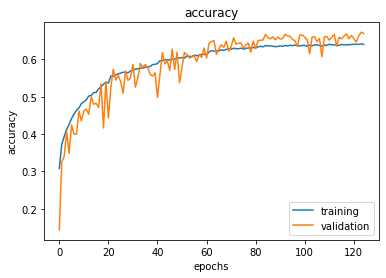

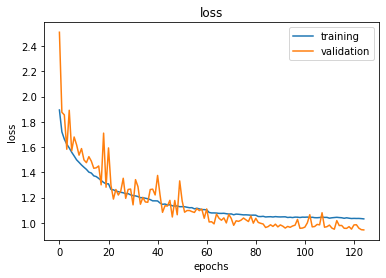

Loss: 94.43%
Accuracy: 66.90%


In [ ]:
import tensorflow as tf
import os
import tensorflow.keras.layers as layers
import numpy as np
import pickle
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

# TPU
tpu_grpc_url = "grpc://" + os.environ["COLAB_TPU_ADDR"]
tpu_cluster_resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_grpc_url)
tf.config.experimental_connect_to_cluster(tpu_cluster_resolver)
tf.tpu.experimental.initialize_tpu_system(tpu_cluster_resolver)
strategy = tf.distribute.experimental.TPUStrategy(tpu_cluster_resolver)

def data_augmentation(image):
    y = tf.cast(image, tf.float32) / 255.0
    y = tf.image.random_flip_left_right(y)
    y = tf.pad(y, tf.constant([[2, 2], [2, 2], [0, 0]]), "REFLECT")
    y = tf.image.random_crop(y, size=[32, 32, 3])
    return y

def conv_bn_relu(inputs, ch, reps):
    y = inputs
    for i in range(reps):
        y = layers.Conv2D(ch, 3, padding="same")(y)
        y = layers.BatchNormalization()(y)
        y = layers.Activation("elu")(y)
    return y

def create_model():
    inputs = layers.Input((32, 32, 3))
    weight_decay = 1e-4
    y = conv_bn_relu(inputs, 64, 1)
    y = layers.AveragePooling2D(2)(y)
    y = conv_bn_relu(y, 128, 1)
    y = layers.AveragePooling2D(2)(y)
    y = conv_bn_relu(y, 256, 1)
    y = layers.GlobalAveragePooling2D()(y)
    y = layers.Dropout(0.2)(y)
    y = layers.Flatten()(y)
    y = layers.Dense(10, activation="softmax")(y)
    return tf.keras.models.Model(inputs, y)

def load_dataset():
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    trainset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    trainset = trainset.map(
        lambda image, label: (data_augmentation(image), tf.cast(label, tf.float32))
    ).shuffle(buffer_size=1024).repeat().batch(128)

    testset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
    testset = testset.map(
        lambda image, label: (tf.cast(image, tf.float32) / 255.0, tf.cast(label, tf.float32))
    ).batch(128)

    return trainset, testset

def lr_scheduler(epoch):
    lrate = 0.001
    if epoch > 20:
        lrate = 0.0005
    if epoch > 40:
        lrate = 0.0003
    if epoch > 60:
        lrate = 0.0001
    if epoch > 80:
        lrate = 0.00003  
    if epoch > 100:
        lrate = 0.00005
    return lrate

def main():
    trainset, testset = load_dataset()
    with strategy.scope():
        model = create_model()
        loss = tf.keras.losses.SparseCategoricalCrossentropy()
        acc = tf.keras.metrics.SparseCategoricalAccuracy()
        optim = tf.keras.optimizers.SGD(0.001, momentum=0.9)

        # callback
        scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
        hist = tf.keras.callbacks.History()
        # cp_cnn = ModelCheckpoint("best_CNN_cifar10.hdf5", verbose=1, save_best_only=True)

        # train
        model.compile(optimizer=optim, loss=loss, metrics=[acc])
        model.summary()
        model.fit(trainset, validation_data=testset, epochs=125, steps_per_epoch=50000 // 128,
                  callbacks=[scheduler, hist], shuffle=True)
    
    # model.load_weights("best_CNN_cifar10.hdf5")
    history = hist.history
    plt.plot(history['sparse_categorical_accuracy'])
    plt.plot(history['val_sparse_categorical_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()
    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

    score = model.evaluate(testset, verbose=0)
    print("Loss: %.2f%%" % (score[0]*100))
    print("Accuracy: %.2f%%" % (score[1]*100))

main()

#### **Configuration 8 (TPU): CNN with MaxPooling, 0.25 Dropout, elu, and lrs - Acc:81.36%**

INFO:tensorflow:Initializing the TPU system: grpc://10.11.152.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.11.152.2:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Epoch 1/125
  1/390 [..............................] - ETA: 0s - loss: 3.3164 - sparse_categorical_accuracy: 0.0859WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0055s vs `on_train_batch_end` time: 0.0130s). Check your callbacks.


387/390 [============================>.] - ETA: 0s - loss: 1.9178 - sparse_categorical_accuracy: 0.3682WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0018s vs `on_test_batch_end` time: 0.0129s). Check your callbacks.


390/390 [==============================] - 11s 28ms/step - loss: 1.9154 - sparse_categorical_accuracy: 0.3688 - val_loss: 2.2873 - val_sparse_categorical_accuracy: 0.2404
Epoch 2/125
390/390 [==============================] - 9s 22ms/step - loss: 1.5065 - sparse_categorical_accuracy: 0.4734 - val_loss: 1.6211 - val_sparse_categorical_accuracy: 0.4868
Epoch 3/125
390/390 [==============================] - 8s 22ms/step - loss: 1.3791 - sparse_categorical_accuracy: 0.5179 - val_loss: 1.6975 - val_sparse_categorical_accuracy: 0.4556
Epoch 4/125
390/390 [==============================] - 9s 22ms/step - loss: 1.2883 - sparse_categorical_accuracy: 0.5494 - val_loss: 1.6024 - val_sparse_categorical_accuracy: 0.4929
Epoch 5/125
390/390 [==============================] - 8s 22ms/step - loss: 1.2236 - sparse_categorical_accuracy: 0.5717 - val_loss: 1.4556 - val_sparse_categorical_accuracy: 0.5115
Epoch 6/125
390/390 [==============================] - 8s 21ms/step - loss: 1.1714 - sparse_categoric

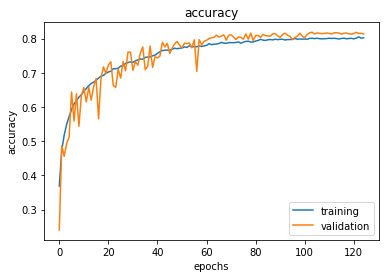

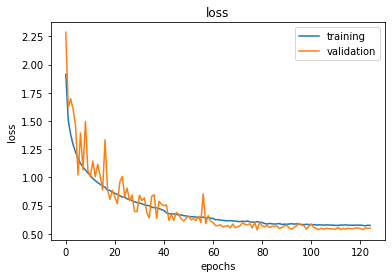

Loss: 55.05%
Accuracy: 81.36%


In [ ]:
import tensorflow as tf
import os
import tensorflow.keras.layers as layers
import numpy as np
import pickle
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

# TPU
tpu_grpc_url = "grpc://" + os.environ["COLAB_TPU_ADDR"]
tpu_cluster_resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_grpc_url)
tf.config.experimental_connect_to_cluster(tpu_cluster_resolver)
tf.tpu.experimental.initialize_tpu_system(tpu_cluster_resolver)
strategy = tf.distribute.experimental.TPUStrategy(tpu_cluster_resolver)

def data_augmentation(image):
    y = tf.cast(image, tf.float32) / 255.0
    y = tf.image.random_flip_left_right(y)
    y = tf.pad(y, tf.constant([[2, 2], [2, 2], [0, 0]]), "REFLECT")
    y = tf.image.random_crop(y, size=[32, 32, 3])
    return y

def conv_bn_elu(inputs, ch, reps):
    y = inputs
    for i in range(reps):
        y = layers.Conv2D(ch, 5, padding="same")(y)
        y = layers.BatchNormalization()(y)
        y = layers.Activation("elu")(y)
    return y

def create_model():
    inputs = layers.Input((32, 32, 3))
    y = conv_bn_elu(inputs, 64, 1)
    y = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(y)
    y = layers.Dropout(0.25)(y)
    y = conv_bn_elu(y, 128, 1)
    y = layers.MaxPooling2D(pool_size=(2,2))(y)
    y = layers.Dropout(0.25)(y)
    y = conv_bn_elu(y, 256, 1)
    y = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(y)
    y = layers.Dropout(0.25)(y)
    y = layers.Flatten()(y)
    y = layers.Dense(10, activation="softmax")(y)
    return tf.keras.models.Model(inputs, y)

def load_dataset():
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    trainset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    trainset = trainset.map(
        lambda image, label: (data_augmentation(image), tf.cast(label, tf.float32))
    ).shuffle(buffer_size=1024).repeat().batch(128)

    testset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
    testset = testset.map(
        lambda image, label: (tf.cast(image, tf.float32) / 255.0, tf.cast(label, tf.float32))
    ).batch(128)

    return trainset, testset

def lr_scheduler(epoch):
    lrate = 0.001
    if epoch > 40:
        lrate = 0.0005
    if epoch > 60:
        lrate = 0.0003
    if epoch > 80:
        lrate = 0.0001
    if epoch > 100:
        lrate = 0.00003  
    return lrate

def main():
    trainset, testset = load_dataset()
    with strategy.scope():
        model = create_model()
        loss = tf.keras.losses.SparseCategoricalCrossentropy()
        acc = tf.keras.metrics.SparseCategoricalAccuracy()
        optim = tf.keras.optimizers.SGD(0.001, momentum=0.9)

        # callback
        scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
        hist = tf.keras.callbacks.History()
        # cp_cnn = ModelCheckpoint("best_CNN_cifar10.hdf5", verbose=1, save_best_only=True)

        # train
        model.compile(optimizer=optim, loss=loss, metrics=[acc])
        model.summary()
        model.fit(trainset, validation_data=testset, epochs=125, steps_per_epoch=50000 // 128,
                  callbacks=[scheduler, hist], shuffle=True)
    
    # model.load_weights("best_CNN_cifar10.hdf5")
    history = hist.history
    plt.plot(history['sparse_categorical_accuracy'])
    plt.plot(history['val_sparse_categorical_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()
    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

    score = model.evaluate(testset, verbose=0)
    print("Loss: %.2f%%" % (score[0]*100))
    print("Accuracy: %.2f%%" % (score[1]*100))

main()

#### **Configuration 9 (TPU): CNN with MaxPooling, filter=5, 0.25 Dropout, LeakyReLU(a=0.05), and lrs - Acc:82.85%**

INFO:tensorflow:Initializing the TPU system: grpc://10.11.152.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.11.152.2:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 32, 32, 64)        4864      
_________________________________________________________________
batch_normalization_46 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 16, 16, 128)     

388/390 [============================>.] - ETA: 0s - loss: 1.9092 - sparse_categorical_accuracy: 0.3582WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0017s vs `on_test_batch_end` time: 0.0123s). Check your callbacks.


390/390 [==============================] - 11s 28ms/step - loss: 1.9080 - sparse_categorical_accuracy: 0.3588 - val_loss: 2.3095 - val_sparse_categorical_accuracy: 0.2218
Epoch 2/125
390/390 [==============================] - 9s 22ms/step - loss: 1.5267 - sparse_categorical_accuracy: 0.4622 - val_loss: 1.3952 - val_sparse_categorical_accuracy: 0.5080
Epoch 3/125
390/390 [==============================] - 9s 22ms/step - loss: 1.3628 - sparse_categorical_accuracy: 0.5218 - val_loss: 1.4513 - val_sparse_categorical_accuracy: 0.5008
Epoch 4/125
390/390 [==============================] - 9s 22ms/step - loss: 1.2563 - sparse_categorical_accuracy: 0.5568 - val_loss: 1.4834 - val_sparse_categorical_accuracy: 0.5087
Epoch 5/125
390/390 [==============================] - 9s 22ms/step - loss: 1.1852 - sparse_categorical_accuracy: 0.5832 - val_loss: 1.4124 - val_sparse_categorical_accuracy: 0.5067
Epoch 6/125
390/390 [==============================] - 8s 22ms/step - loss: 1.1302 - sparse_categoric

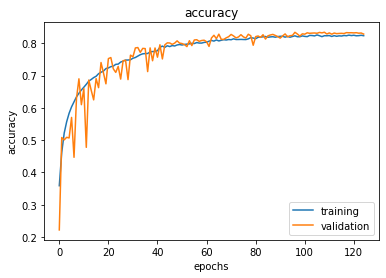

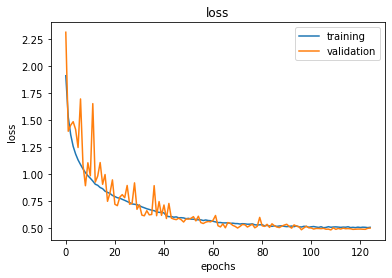

Loss: 50.09%
Accuracy: 82.85%


In [ ]:
import tensorflow as tf
import os
import tensorflow.keras.layers as layers
import numpy as np
import pickle
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

# TPU
tpu_grpc_url = "grpc://" + os.environ["COLAB_TPU_ADDR"]
tpu_cluster_resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_grpc_url)
tf.config.experimental_connect_to_cluster(tpu_cluster_resolver)
tf.tpu.experimental.initialize_tpu_system(tpu_cluster_resolver)
strategy = tf.distribute.experimental.TPUStrategy(tpu_cluster_resolver)

def data_augmentation(image):
    y = tf.cast(image, tf.float32) / 255.0
    y = tf.image.random_flip_left_right(y)
    y = tf.pad(y, tf.constant([[2, 2], [2, 2], [0, 0]]), "REFLECT")
    y = tf.image.random_crop(y, size=[32, 32, 3])
    return y

def conv_bn_elu(inputs, ch, reps):
    y = inputs
    for i in range(reps):
        y = layers.Conv2D(ch, 5, padding="same")(y)
        # y = layers.BatchNormalization()(y)
        y = layers.LeakyReLU(alpha=0.05)(y)
    return y

def create_model():
    inputs = layers.Input((32, 32, 3))
    y = conv_bn_elu(inputs, 64, 1)
    y = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(y)
    y = layers.Dropout(0.25)(y)
    y = conv_bn_elu(y, 128, 1)
    y = layers.MaxPooling2D(pool_size=(2,2))(y)
    y = layers.Dropout(0.25)(y)
    y = conv_bn_elu(y, 256, 1)
    y = layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(y)
    y = layers.Dropout(0.25)(y)
    y = layers.Flatten()(y)
    y = layers.Dense(10, activation="softmax")(y)
    return tf.keras.models.Model(inputs, y)

def load_dataset():
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    trainset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    trainset = trainset.map(
        lambda image, label: (data_augmentation(image), tf.cast(label, tf.float32))
    ).shuffle(buffer_size=1024).repeat().batch(128)

    testset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
    testset = testset.map(
        lambda image, label: (tf.cast(image, tf.float32) / 255.0, tf.cast(label, tf.float32))
    ).batch(128)

    return trainset, testset

def lr_scheduler(epoch):
    lrate = 0.001
    if epoch > 40:
        lrate = 0.0005
    if epoch > 60:
        lrate = 0.0003
    if epoch > 80:
        lrate = 0.0001
    if epoch > 100:
        lrate = 0.00003  
    return lrate

def main():
    trainset, testset = load_dataset()
    with strategy.scope():
        model = create_model()
        loss = tf.keras.losses.SparseCategoricalCrossentropy()
        acc = tf.keras.metrics.SparseCategoricalAccuracy()

        # callback
        scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
        hist = tf.keras.callbacks.History()
        # cp_cnn = ModelCheckpoint("best_CNN_cifar10.hdf5", verbose=1, save_best_only=True)
        optim = tf.keras.optimizers.SGD(0.001, momentum=0.9)

        # train
        model.compile(optimizer=optim, loss=loss, metrics=[acc])
        model.summary()
        model.fit(trainset, validation_data=testset, epochs=125, steps_per_epoch=50000 // 128,
                  callbacks=[scheduler, hist], shuffle=True)
    
    # model.load_weights("best_CNN_cifar10.hdf5")
    history = hist.history
    plt.plot(history['sparse_categorical_accuracy'])
    plt.plot(history['val_sparse_categorical_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()
    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

    score = model.evaluate(testset, verbose=0)
    print("Loss: %.2f%%" % (score[0]*100))
    print("Accuracy: %.2f%%" % (score[1]*100))

main()

#### **Configuration 10 (TPU): 3 CNN blocks with Ave.Pooling, filter=3, 0.25 Dropout, elu, and lrs - Acc:89.17%**

INFO:tensorflow:Initializing the TPU system: grpc://10.11.152.2:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.11.152.2:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Model: "functional_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_58 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_46 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_59 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_47 (Activation)   (None, 32, 32, 64)      

390/390 [==============================] - ETA: 0s - loss: 1.6438 - sparse_categorical_accuracy: 0.4006WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0020s vs `on_test_batch_end` time: 0.0122s). Check your callbacks.


390/390 [==============================] - 14s 36ms/step - loss: 1.6438 - sparse_categorical_accuracy: 0.4006 - val_loss: 2.2315 - val_sparse_categorical_accuracy: 0.2359
Epoch 2/250
390/390 [==============================] - 11s 29ms/step - loss: 1.3685 - sparse_categorical_accuracy: 0.5136 - val_loss: 1.3426 - val_sparse_categorical_accuracy: 0.5117
Epoch 3/250
390/390 [==============================] - 11s 28ms/step - loss: 1.2294 - sparse_categorical_accuracy: 0.5661 - val_loss: 1.2021 - val_sparse_categorical_accuracy: 0.5625
Epoch 4/250
390/390 [==============================] - 11s 29ms/step - loss: 1.1448 - sparse_categorical_accuracy: 0.5970 - val_loss: 1.1604 - val_sparse_categorical_accuracy: 0.5852
Epoch 5/250
390/390 [==============================] - 11s 29ms/step - loss: 1.0727 - sparse_categorical_accuracy: 0.6240 - val_loss: 1.0167 - val_sparse_categorical_accuracy: 0.6431
Epoch 6/250
390/390 [==============================] - 12s 31ms/step - loss: 1.0176 - sparse_cate

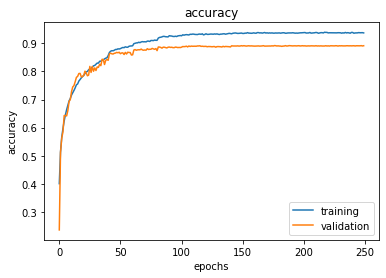

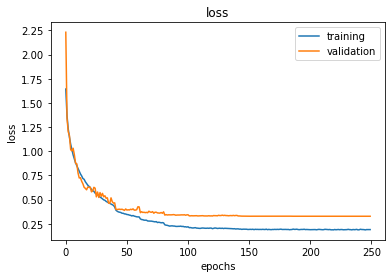

Loss: 32.79%
Accuracy: 89.17%


In [ ]:
import tensorflow as tf
import os
import tensorflow.keras.layers as layers
import numpy as np
import pickle
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
import math

# TPU
tpu_grpc_url = "grpc://" + os.environ["COLAB_TPU_ADDR"]
tpu_cluster_resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_grpc_url)
tf.config.experimental_connect_to_cluster(tpu_cluster_resolver)
tf.tpu.experimental.initialize_tpu_system(tpu_cluster_resolver)
strategy = tf.distribute.experimental.TPUStrategy(tpu_cluster_resolver)

def data_augmentation(image):
    y = tf.cast(image, tf.float32) / 255.0
    y = tf.image.random_flip_left_right(y)
    y = tf.pad(y, tf.constant([[2, 2], [2, 2], [0, 0]]), "REFLECT")
    y = tf.image.random_crop(y, size=[32, 32, 3])
    return y

def conv_bn_elu(inputs, ch, reps):
    y = inputs
    for i in range(reps):
        y = layers.Conv2D(ch, 3, padding="same")(y)
        y = layers.BatchNormalization()(y)
        y = layers.Activation('elu')(y)
    return y

def create_model():
    inputs = layers.Input((32, 32, 3))
    y = conv_bn_elu(inputs, 64, 3)
    y = layers.AveragePooling2D(2)(y)
    #y = layers.Dropout(0.25)(y)
    y = conv_bn_elu(y, 128, 3)
    y = layers.AveragePooling2D(2)(y)
    #y = layers.Dropout(0.25)(y)
    y = conv_bn_elu(y, 256, 3)
    y = layers.GlobalAveragePooling2D()(y)
    y = layers.Dropout(0.25)(y)
    y = layers.Flatten()(y)
    y = layers.Dense(10, activation="softmax")(y)
    return tf.keras.models.Model(inputs, y)

def load_dataset():
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
    trainset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    trainset = trainset.map(
        lambda image, label: (data_augmentation(image), tf.cast(label, tf.float32))
    ).shuffle(buffer_size=1024).repeat().batch(128)

    testset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
    testset = testset.map(
        lambda image, label: (tf.cast(image, tf.float32) / 255.0, tf.cast(label, tf.float32))
    ).batch(128)

    return trainset, testset

def lr_scheduler(epoch):
    lrate = 0.001
    # drop = 0.5
    # epochs_drop = 10.0
    # lrate = ilrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    if epoch > 40:
        lrate = 0.0005
    if epoch > 60:
        lrate = 0.0003
    if epoch > 80:
        lrate = 0.0001
    if epoch > 100:
        lrate = 0.00003
    if epoch > 120:
        lrate = 0.00005
    if epoch > 140:
        lrate = 0.000001
    if epoch > 160:
        lrate = 0.000003
    if epoch > 180:
        lrate = 0.000005   
    if epoch > 200:
        lrate = 0.0000001   
    return lrate

def main():
    trainset, testset = load_dataset()
    with strategy.scope():
        model = create_model()
        loss = tf.keras.losses.SparseCategoricalCrossentropy()
        acc = tf.keras.metrics.SparseCategoricalAccuracy()

        # callback
        scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)
        hist = tf.keras.callbacks.History()
        # cp_cnn = ModelCheckpoint("best_CNN_cifar10.hdf5", verbose=1, save_best_only=True)
        optim = tf.keras.optimizers.SGD(0.001, momentum=0.9)

        # train
        model.compile(optimizer=optim, loss=loss, metrics=[acc])
        model.summary()
        model.fit(trainset, validation_data=testset, epochs=250, steps_per_epoch=50000 // 128,
                  callbacks=[scheduler, hist], shuffle=True)
    
    # model.load_weights("best_CNN_cifar10.hdf5")
    history = hist.history
    plt.plot(history['sparse_categorical_accuracy'])
    plt.plot(history['val_sparse_categorical_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()
    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

    score = model.evaluate(testset, verbose=0)
    print("Loss: %.2f%%" % (score[0]*100))
    print("Accuracy: %.2f%%" % (score[1]*100))

main()